In [2]:
import torch
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from ptsne.ptsne import ParametricTSNE
from matplotlib import pyplot as plt

In [3]:
mnist = MNIST(
    './data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

In [4]:
testdata = mnist.data.reshape(-1, 28*28) / 255.

Notes from testing:

- `hidden_layer_dims = [300,100]` works well
- learned `alpha` for perplexity of 100 is about 1.8
- learned `alpha` for perplexity of 50 is > 2

In [15]:
foo = ParametricTSNE(28*28, 2, 300, use_cuda=True, hidden_layer_dims=[300,100], alpha=1)

In [16]:
foo.fit(testdata[:20000], p_ij=p_precalc, batch_size=100, epochs=30, learning_rate=0.01, pretrain=True, verbose=True, loss_func='kl')

Calculating PCA
2021-07-29 11:02:58.166004: Beginning pretraining for 5 epochs
2021-07-29 11:02:59.288662: Loss after epoch 0: 98.096912862733
2021-07-29 11:03:00.487780: Loss after epoch 1: 0.5561977937468328
2021-07-29 11:03:01.623571: Loss after epoch 2: 0.46420737489825115
2021-07-29 11:03:02.810009: Loss after epoch 3: 0.37662444409215823
2021-07-29 11:03:03.976045: Loss after epoch 4: 0.5457890141406097
2021-07-29 11:03:03.976045: Finished pretraining
2021-07-29 11:03:03.977013: Beginning training for 30 epochs
2021-07-29 11:03:06.134028: Loss after epoch 1: 807.3964303553796
2021-07-29 11:03:08.306533: Loss after epoch 2: 796.0122663752142
2021-07-29 11:03:10.430554: Loss after epoch 3: 780.0338665821313
2021-07-29 11:03:12.617850: Loss after epoch 4: 776.1367988315914
2021-07-29 11:03:14.782866: Loss after epoch 5: 795.3704878258778
2021-07-29 11:03:16.944734: Loss after epoch 6: 774.227485698428
2021-07-29 11:03:19.168374: Loss after epoch 7: 772.9967902287495
2021-07-29 11:03

In [7]:
p_precalc = foo.p_ij

In [8]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [17]:
bar = foo(testdata[:20000].cuda()).cpu().detach().numpy()

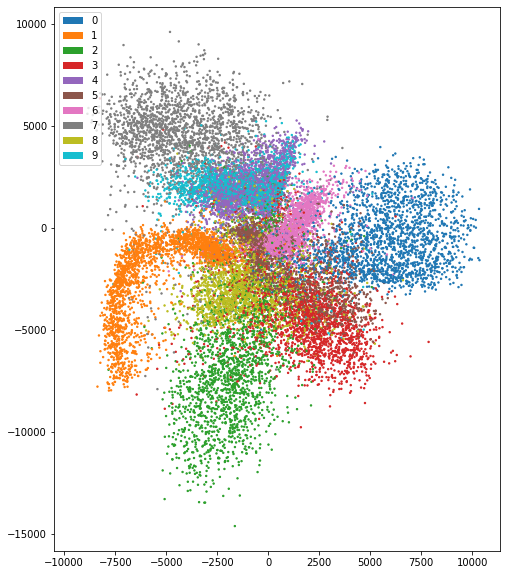

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
colors = [plt.cm.tab10.colors[i] for i in mnist.targets[:20000]]
ax.scatter(bar[:,0],bar[:,1],c=colors, s=2)
ax.set_aspect(1)
recs = []
for i in range(0,10):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=plt.cm.tab10.colors[i]))
ax.legend(recs,list(range(10)),loc=2)